# Machine Learning -  Linear Regression in Python

### Simple Linear Regression 
* [Gradient Descent Python Implementation](#1)
* [Scipy Implementation](#2)
* [Scikit-Learn Implementation](#3)
* [Statsmodel Implementation](#4)
* [Multi-step visual of Gradient Descent](#5)
* [Animating the Gradient Descent](#6)  

### [Multi Linear Regression](#7)
* [Gradient Descent Python Implementation](#8)
* [Scikit-Learn Implementation](#9)
* [Solving with Normal Equation](#10)
* [Scipy Implementation](#11)
* [Statsmodel Implementation](#12)

# Linear Regression

Importing needed libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Loading the data set ex1data1.txt

In [16]:
dataset = pd.read_csv('ex1data1.txt', names=['x','y'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
x    97 non-null float64
y    97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


Creating our x and y variables. Then plotting to gain an intuition on how the data looks like.

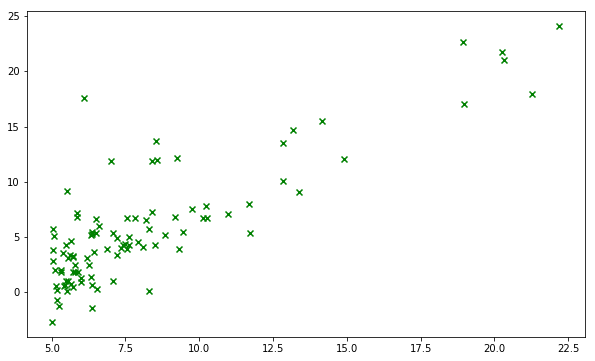

In [17]:
x = dataset.x.values
y = dataset.y.values

plt.figure(figsize=(10,6))
plt.scatter(x,y, marker='x', color='g')

### Equations
Objective of Linear Regression is to minimize the cost function: 
<br>
<br>
$J(\theta) = \frac{1}{2m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2$
<br>
<br>
where the hypothesis $h_\theta(x)$ is given by the lienar model:  

$h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1$  
<br>
In batch gradient descent, each iteration performs the update:  
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta (x^{(i)}) - y^{(i)})x_j^{(i)}$


In [18]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
x = np.concatenate((np.ones(len(x)).reshape(-1,1), x), axis=1)

#### Cost Function $J(\theta)$

In [19]:
def computeCost(x, y, theta):
    m = len(y)
    h_x = np.dot(x, theta)
    j = np.sum(np.square(h_x - y))/(2*m)
    return j

In [20]:
#Run our initial test 
theta = np.zeros((2,1))
print('Tesitng the cost function .... ')
J = computeCost(x, y, theta)

print('With theta = [[0],[0]] the cost computed = {}'.format(J))
print('Expected cost value (approx) 32.07')


Tesitng the cost function .... 
With theta = [[0],[0]] the cost computed = 32.072733877455676
Expected cost value (approx) 32.07


** Further testing of the cost function **

In [21]:
J = computeCost(x, y, np.array([[-1],[2]]));
print('With theta = [-1 ; 2] Cost computed = ', J);
print('Expected cost value (approx) 54.24\n');

With theta = [-1 ; 2] Cost computed =  54.242455082
Expected cost value (approx) 54.24



<a id='1'></a>
## Gradient Descent Manual Implementation
#### Gradient Descent Function

In [22]:
def GradientDescent(x, y, theta, alpha, iteration):
    print('Running Gradient Descent')
    j = []
    for i in range(0,iteration+1):
        j.append(computeCost(x, y, theta))
        m = len(y)
        h_x = np.dot(x, theta)
        theta[1] = theta[1] - alpha/m *(np.sum( np.dot(x.T, (h_x) - y)))
        theta[0] = theta[0] - alpha/m *(np.sum((h_x) - y))
        #print(theta[0], theta[1])
    return theta, j

In [23]:
theta = np.zeros((2,1))
iteration = 5000
alpha = 0.01

theta, cost = GradientDescent(x, y, theta, alpha, iteration)
print('Theta found by Gradient Descent: ', theta)
print('Expected theta values (approx) -3.6303 , 1.1664')

Running Gradient Descent
Theta found by Gradient Descent:  [[-3.89469788]
 [ 1.19292268]]
Expected theta values (approx) -3.6303 , 1.1664


** Plotting the linear fit **

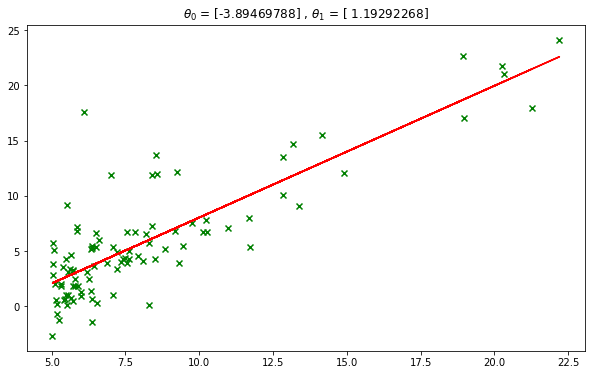

In [24]:
plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(theta[0], theta[1]))
plt.scatter(x[:,1],y, marker='x', color='g')
plt.plot(x[:,1], np.dot(x, theta), 'r')

Text(0,0.5,'Cost')

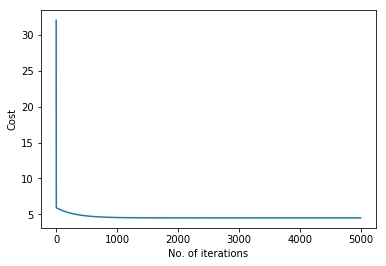

In [25]:
plt.plot(cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

<a id='2'></a>
## Implement with using Scipy

In [15]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(x[:,1].reshape(1,-1), y.reshape(1,-1))

/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:116: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:118: RuntimeWarning: invalid value encountered in sqrt
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [16]:
print('theta[0] = ', intercept)
print('theta[1] = ', slope)

theta2 = np.array([intercept, slope]) 

theta[0] =  -3.89578087831
theta[1] =  1.19303364419


#### Plot the linear fit using the slop and intercept values from scipy

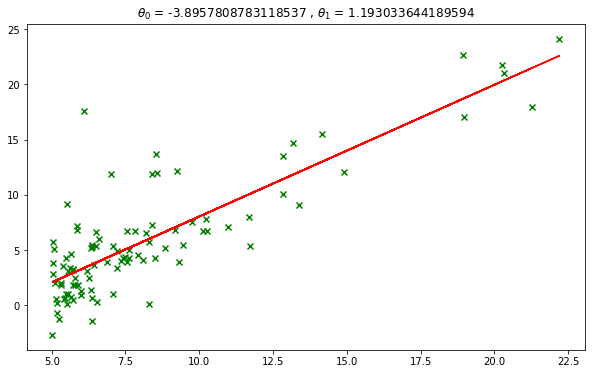

In [17]:
plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(theta2[0], theta2[1]))
plt.scatter(x[:,1],y, marker='x', color='g')
plt.plot(x[:,1], np.dot(x, theta2), 'r')

<a id='3'></a>
## Implement using Scikit-Learn

In [18]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(x[:,1].reshape(-1,1), y.reshape(-1,1))
y_hat = slr.predict(x[:,1].reshape(-1,1))

print('theta[0] = ', slr.intercept_)
print('theta[1] = ', slr.coef_)

theta3 = np.array([slr.intercept_, slr.coef_])

theta[0] =  [-3.89578088]
theta[1] =  [[ 1.19303364]]


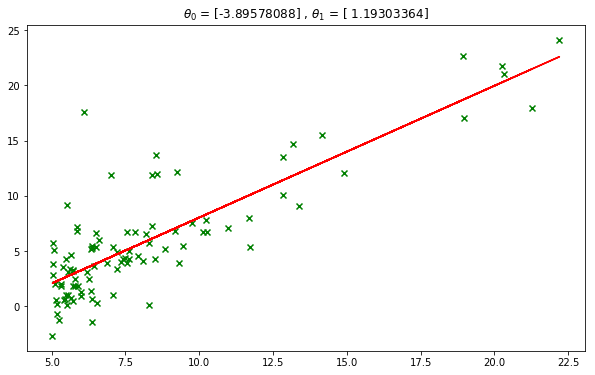

In [19]:
plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(theta3[0], theta3[1]))
plt.scatter(x[:,1],y, marker='x', color='g')
plt.plot(x[:,1], np.dot(x, theta3), 'r')

<a id='4'></a>
## Implement using Statsmodel

In [20]:
import statsmodels.api as sm

results = sm.OLS(y, x).fit()
results.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     223.8
Date:                Sat, 13 Jan 2018   Prob (F-statistic):           1.02e-26
Time:                        19:03:02   Log-Likelihood:                -243.95
No. Observations:                  97   AIC:                             491.9
Df Residuals:                      95   BIC:                             497.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8958      0.719     -5.415      0.000      -5.324      -2.467
x1             1.1930      0.080     14.961      0.000       1.035       1.351
==============================================================================
Omnibus:                       39.986   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.142
Skew:                           1.455   Prob(JB):                     3.29e-24
Kurtosis:                       7.276   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

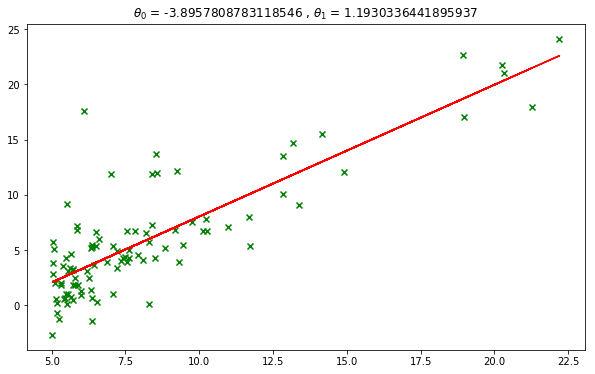

In [21]:
theta4 = results.params

plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(theta4[0], theta4[1]))
plt.scatter(x[:,1],y, marker='x', color='g')
plt.plot(x[:,1], np.dot(x, theta4), 'r')

<a id='5'></a>
### Multi-step Gradient Descent progress

In [22]:
# placeholder = np.zeros((2001, 2, 1))
# error = np.zeros((2001,1))
# pred = np.zeros((2001,97,1))

def GradientDescent_w_plot(x, y, theta, alpha, iteration):
    print('Running Gradient Descent')
    print(theta)
    j = []
    for i in range(0,iteration+1):
        j.append(computeCost(x, y, theta))
        m = len(y)
        h_x = np.dot(x, theta)
#         placeholder[i] = np.array([theta[0],theta[1]])
#         error[i] = j[i]
#         pred[i] = h_x[i]
        #print(h_x.shape)
        theta[1] = theta[1] - alpha/m *(np.sum(((h_x) - y)*x))
        theta[0] = theta[0] - alpha/m *(np.sum((h_x) - y))
        if i in range(5):
            plt.figure(figsize=(10,6))
            plt.title('Iteration no. {} and $\\theta_0$ = {} , $\\theta_1$ = {}'.format(i, theta[0], theta[1]))
            plt.scatter(x[:,1],y, marker='x', color='g')
            plt.plot(x[:,1], np.dot(x, theta), 'r')
            plt.show()
        elif i < 500 and i % 100 == 0:
            plt.figure(figsize=(10,6))
            plt.title('Iteration no. {} and $\\theta_0$ = {} , $\\theta_1$ = {}'.format(i, theta[0], theta[1]))
            plt.scatter(x[:,1],y, marker='x', color='g')
            plt.plot(x[:,1], np.dot(x, theta), 'r')
            plt.show()
        elif i % 500 ==0:
            plt.figure(figsize=(10,6))
            plt.title('Iteration no. {} and $\\theta_0$ = {} , $\\theta_1$ = {}'.format(i, theta[0], theta[1]))
            plt.scatter(x[:,1],y, marker='x', color='g')
            plt.plot(x[:,1], np.dot(x, theta), 'r')
            plt.show()
        thata = np.array([theta[0], theta[1]]) 
    return theta, j

Running Gradient Descent
[[ 0.]
 [ 0.]]


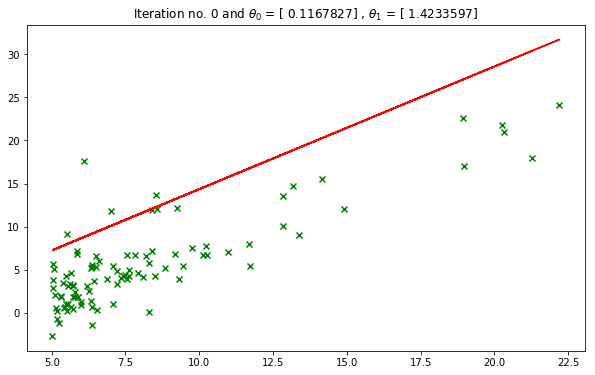

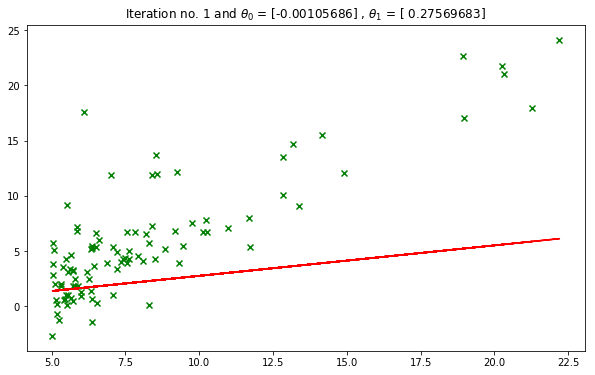

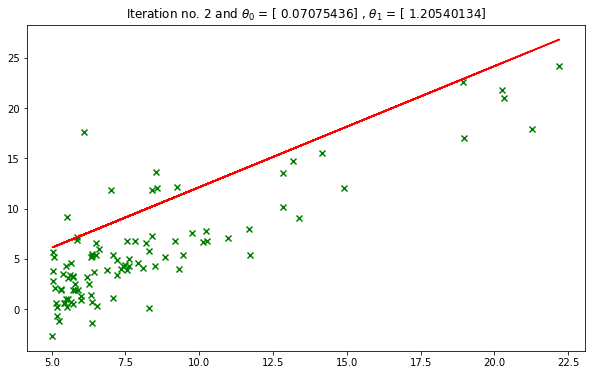

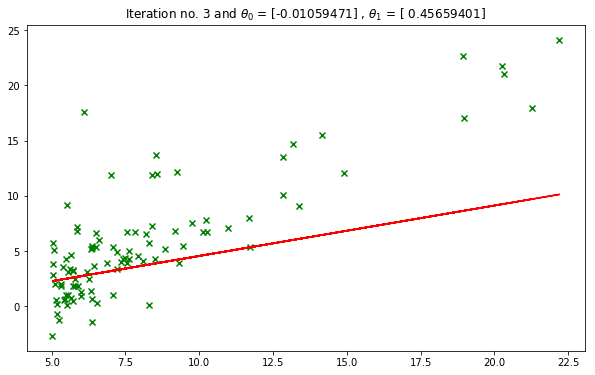

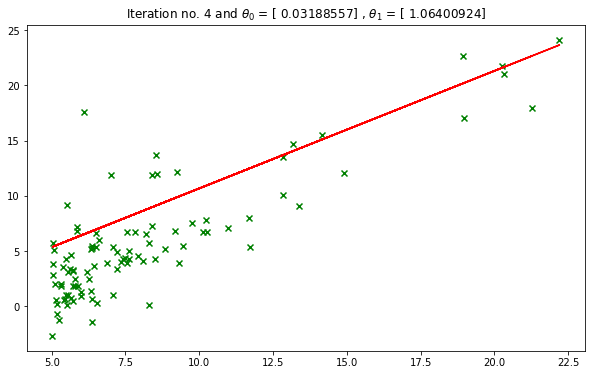

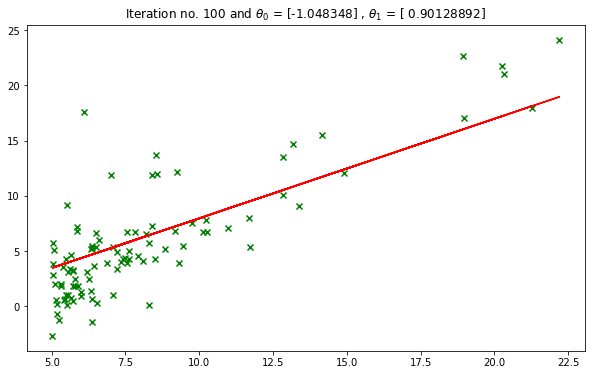

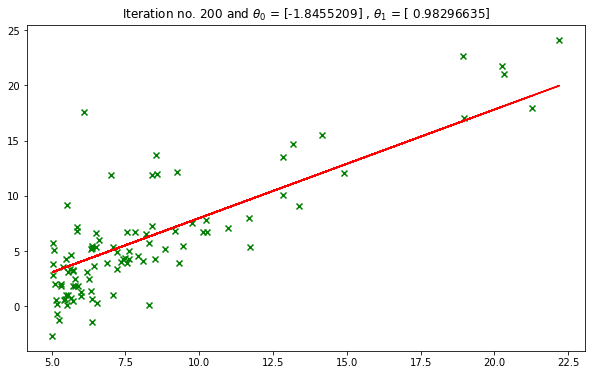

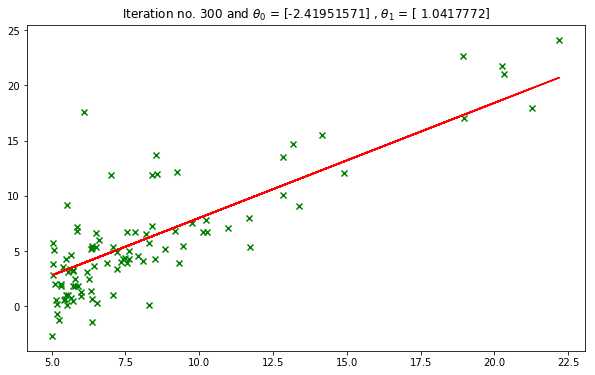

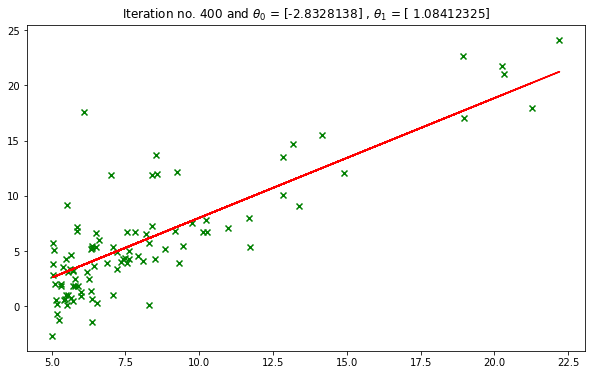

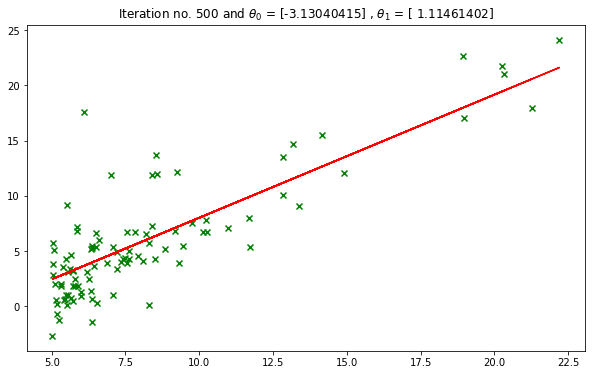

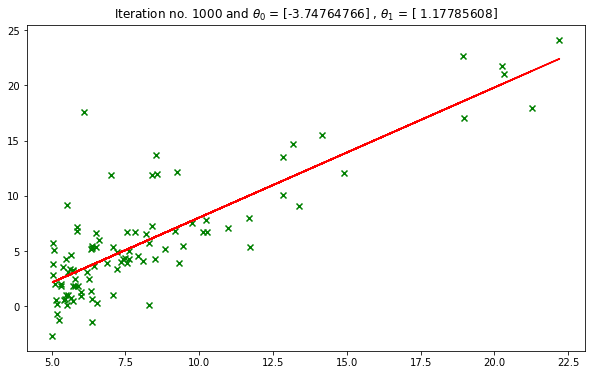

Theta found by Gradient Descent:  [[-3.74764766]
 [ 1.17785608]]


In [23]:
theta5 = np.zeros((2,1))
iteration = 1000
alpha = 0.02

theta6, cost_gd = GradientDescent_w_plot(x, y, theta5, alpha, iteration)
print('Theta found by Gradient Descent: ', theta6)

<a id='6'></a>
### Animating Gradient Descent

In [75]:
from matplotlib import animation, rc
#plt.rcParams["animation.gif"] = "jshtml"
plt.rcParams['animation.convert_path'] = '/usr/local/bin/magick'
import seaborn

writer = animation.ImageMagickFileWriter()

fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(5, 23), ylim=(-5, 25))
plt.title('Gradient Descent')
plt.plot(x[:,1],y,'o' )
# plt.plot(x[:,1], np.dot(x, theta4), 'r')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1,700000, '')
annotation.set_animated(True)
plt.close()

def init():
    """Clears current frame."""
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation


def animate(i):
    """Draw figure.
    @param i: Frame counter
    @type i: int
    """
    ys = pred[i]
    #plt.plot(x[:,1], ys)
    #plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(placeholder[i][0], placeholder[i][1]))
    line.set_data(x[:,1], ys)
    annotation.set_text('Cost = %.2f e10' % (cost_gd[i]))
    return line, annotation

# fig = plt.figure(figsize=(10,6))
# ax = plt.axes(xlim=(5, 23), ylim=(-5, 25))
# line, = ax.plot([], [], lw=2)

# This call puts the work in motion
# connecting init and animate functions and figure we want to draw
anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=300, interval=0, blit=True)

# This call creates the video file.
# Temporary, every frame is saved as PNG file
# and later processed by ffmpeg encoder into MPEG4 file
# we can pass various arguments to ffmpeg via extra_args
#animator.save('basic_animation.mp4')

#animator.save('line.gif', dpi=80, writer='imagemagick')
# HTML(animator.to_jshtml())
anim.save('animation.gif', writer='imagemagick', fps = 30)

#plt.rcParams("")


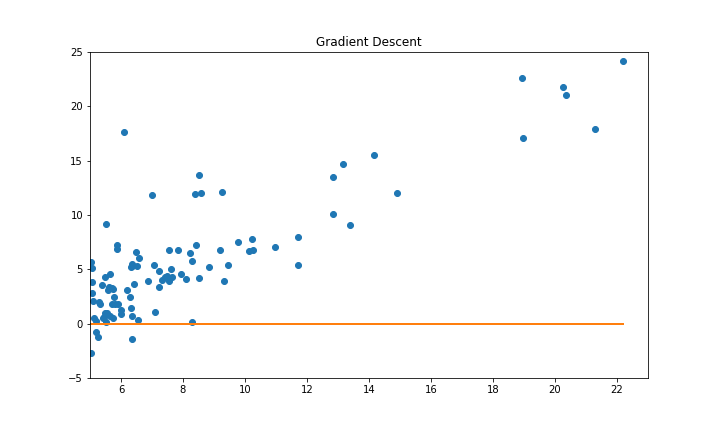

In [76]:
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

Text(0,0.5,'Cost')

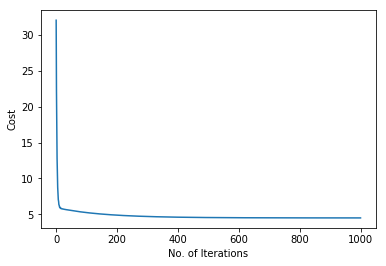

In [79]:
plt.plot(cost_gd)
plt.xlabel('No. of Iterations')
plt.ylabel('Cost')

<a id='7'></a>
# Linear Regression with Multiple Variables

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataset_m = pd.read_csv('ex1data2.txt', names=['x1','x2','y'])
dataset_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
x1    47 non-null int64
x2    47 non-null int64
y     47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [29]:
dataset_m.head()

,x1,x2,y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


** Feature Normalization **

In [30]:
X = dataset_m.iloc[:, [0,1]].values
Y = dataset_m.iloc[:,-1].values

In [31]:
def featureNormalize(x_m):
    mu = np.zeros((1,x_m.shape[1]))
    sigma = np.zeros((1,x_m.shape[1]))
    x_norm = x_m.astype(float)
    
    for i in range(0,len(mu)+1):
        mu[:,i] = x_m[:,i].mean()
        sigma[:,i] = x_m[:,i].std()
        x_norm[:,i] = (x_m[:,i] - mu[:,i])/sigma[:,i]
    return (x_norm, mu, sigma)

** Normalized **

In [32]:
x_norm, mu, sigma = featureNormalize(X)
x_norm = np.concatenate((np.ones(len(x_norm)).reshape(-1,1), x_norm), axis=1)

In [33]:
def computeCost_m(x, y, theta):
    m = len(y)
    h_x = np.dot(x, theta)
    j = np.sum(np.square(h_x - y))/(2*m)
    return j

In [34]:
theta_init = np.zeros((3, 1))
computeCost_m(x_norm, Y, theta_init)

3082802761003.5

<a id='8'></a>
## Manual - Gradient Descent

In [35]:
def gradientDescentMulti(X, Y, theta, alpha, num_iters):
    m = len(Y)
    p = np.copy(X)
    t = np.copy(theta)
    j = []
    print('Running Gradient Descent')
    for i in range(0,num_iters+1):
        cost = computeCost_m(p, Y, t)
        j.append(cost)
        h_x = np.dot(p, t)
        err = h_x - Y
        for f in range(theta.size):
            t[f] = t[f] - alpha/m *(np.sum((np.dot(p[:,f].T, err))))
    return j, t

#  theta[1] = theta[1] - alpha/m *(np.sum( np.dot(x.T, (h_x) - y)))
#         theta[0] = theta[0] - alpha/m *(np.sum((h_x) - y))

Running Gradient Descent


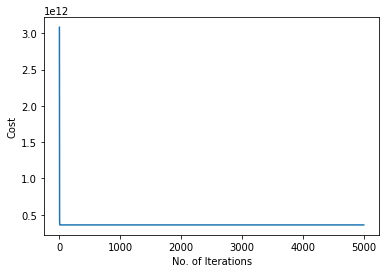

In [36]:
# theta_init = np.zeros((3, 1))
alpha = 0.01
num_iters = 5000
theta_init = np.zeros((3, 1))
cost, theta_final = gradientDescentMulti(x_norm, Y, theta_init, alpha, num_iters)

plt.figure()
plt.plot(cost)
plt.xlabel('No. of Iterations')
plt.ylabel('Cost')
plt.show()

In [37]:
theta_final

array([[  3.40412660e+05],
       [  9.32994561e-12],
       [ -8.81133664e-12]])

In [38]:
theta_init

array([[ 0.],
       [ 0.],
       [ 0.]])

#### Predict 1650 SQFT and 3 Bedrooms

In [50]:
a = np.array([(1650 - mu[:,0]) / sigma[:,0],(3 - mu[:,1]) / sigma[:,1]]).reshape(1,-1)

In [51]:
print("using sklearn : ",mlr.predict(a.reshape(1,-1)))
print("using manual GD : " , theta_final[0] + theta_final[1] * a[:,0] + theta_final[2] * a[:,1])

using sklearn :  [ 293081.4643349]
using manual GD :  [ 340412.65957447]


<a id='9'></a>
## Multi-variable Regression with Scikit-Learn

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

mlr = LinearRegression()
sc_x = StandardScaler()
X_new = sc_x.fit_transform(X)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [44]:
mlr.fit(X_new, Y)
y_hat = mlr.predict(X_new)

In [45]:
mlr.score(X_new, Y)

0.73294501802891432

In [46]:
mlr.intercept_

340412.6595744681

In [47]:
mlr.coef_

array([ 109447.79646964,   -6578.35485416])

#### Predicting 1650 SQFT and 3 Bedrooms manually

In [48]:
house = sc_x.transform(np.array([1650,3]).reshape(1,-1))
mlr.intercept_ + (mlr.coef_[0] * house[0][0]) + (mlr.coef_[1] * house[0][1])

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


293081.46433489613

#### Predicting 1650 SQFT and 3 Bedrooms using .predict

In [49]:
#from sklearn
mlr.predict(house)

array([ 293081.4643349])

<a id='10'></a>
## Solving with Normal Equation

In [52]:
x_neq = np.concatenate((np.ones(len(X)).reshape(-1,1), X), axis=1)
a = np.linalg.inv(np.dot(x_neq.T, x_neq))
b = np.dot(x_neq.T, Y)
theta_neq = np.dot(a,b)

In [53]:
theta_neq

array([ 89597.9095428 ,    139.21067402,  -8738.01911233])

** Testing for 1650 SQFT and 3 Bedrooms **

In [62]:
theta_neq[0] + theta_neq[1] * 1650 + theta_neq[2] * 3

293081.46433489351

<a id='11'></a>
### Scipy implementation

In [54]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(X_new[:,1].reshape(1,-1), Y.reshape(1,-1))

print('theta[0] = ', intercept)
print('theta[1] = ', slope)

theta[0] =  340412.659574
theta[1] =  54708.8217559


/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:116: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:118: RuntimeWarning: invalid value encountered in sqrt
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


<a id='12'></a>
### Statsmodel implementation
#### Statsmodel WITHOUT Feature Scaling/Normalization

In [64]:
import statsmodels.api as sm
#without feature scaling
results = sm.OLS(Y, x_neq).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     60.38
Date:                Sat, 13 Jan 2018   Prob (F-statistic):           2.43e-13
Time:                        19:04:00   Log-Likelihood:                -586.77
No. Observations:                  47   AIC:                             1180.
Df Residuals:                      44   BIC:                             1185.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        8.96e+04   4.18e+04      2.145      0.037    5421.208    1.74e+05
x1           139.2107     14.795      9.409      0.000     109.393     169.028
x2         -8738.0191   1.55e+04     -0.566      0.575   -3.99e+04    2.24e+04
==============================================================================
Omnibus:                        4.083   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                2.977
Skew:                           0.567   Prob(JB):                        0.226
Kurtosis:                       3.484   Cond. No.                     9.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
tt = results.params

#predict house for 1650 and 3 bedroom
tt[0] + (tt[1] * 1650) + (tt[2] * 3)

293081.46433489595

#### Statsmodel using Feature Scaling/Normalization

In [66]:
import statsmodels.api as sm
#with feature scaling
d = sm.add_constant(X_new)
results = sm.OLS(Y, d).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     60.38
Date:                Sat, 13 Jan 2018   Prob (F-statistic):           2.43e-13
Time:                        19:04:01   Log-Likelihood:                -586.77
No. Observations:                  47   AIC:                             1180.
Df Residuals:                      44   BIC:                             1185.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.404e+05   9637.239     35.323      0.000    3.21e+05     3.6e+05
x1          1.094e+05   1.16e+04      9.409      0.000     8.6e+04    1.33e+05
x2         -6578.3549   1.16e+04     -0.566      0.575      -3e+04    1.69e+04
==============================================================================
Omnibus:                        4.083   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                2.977
Skew:                           0.567   Prob(JB):                        0.226
Kurtosis:                       3.484   Cond. No.                         1.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
tt_fs = results.params

#predict house for 1650 and 3 bedroom
house = sc_x.transform(np.array([1650,3]).reshape(1,-1))
tt_fs[0] + (tt_fs[1] * house[0][0]) + (tt_fs[2] * house[0][1])

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


293081.46433489601